In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib # For saving scalers and encoders

In [22]:
# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [23]:
# Load the data
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [24]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset Info:")
df.info()

Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [25]:
# Check for missing values (represented as spaces or '?')
print("\nMissing Values:")
# The 'TotalCharges' column might be stored as strings with spaces
print(df.isnull().sum())
# Let's check if TotalCharges has any non-numeric values
print(f"\nUnique values in TotalCharges: {df['TotalCharges'].unique()[:10]}")


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values in TotalCharges: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


In [26]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check for NaN values again
print("\nMissing Values after conversion:")
print(df.isna().sum())

# Drop rows with missing values (only 11 rows)
df.dropna(inplace=True)


Missing Values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## Data Visualization

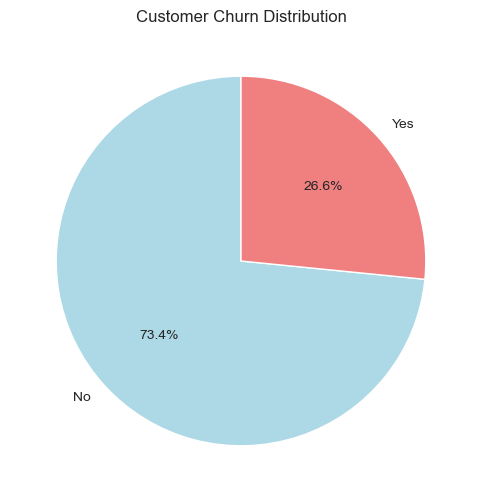

In [27]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Customer Churn Distribution')
plt.show()

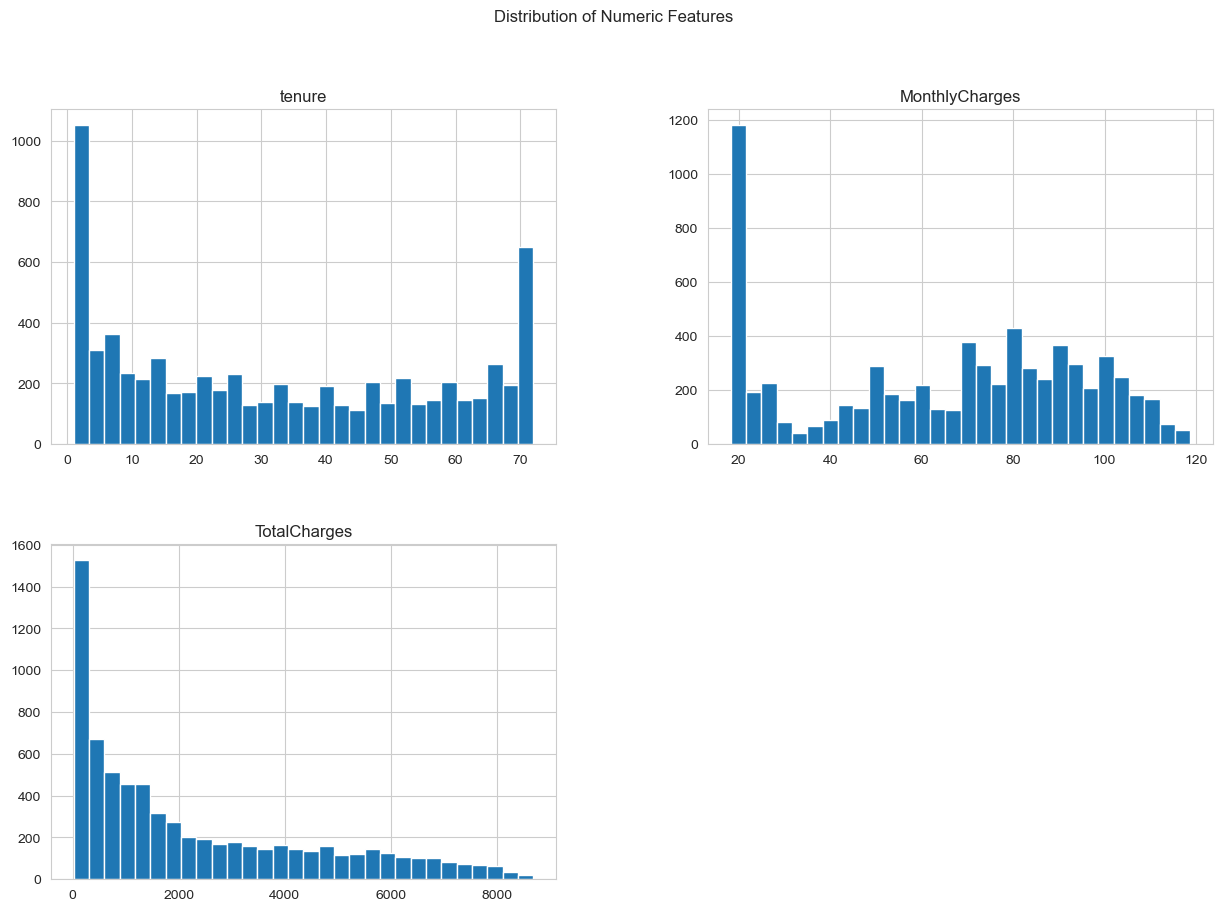

In [28]:
# Numeric Features Distribution
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

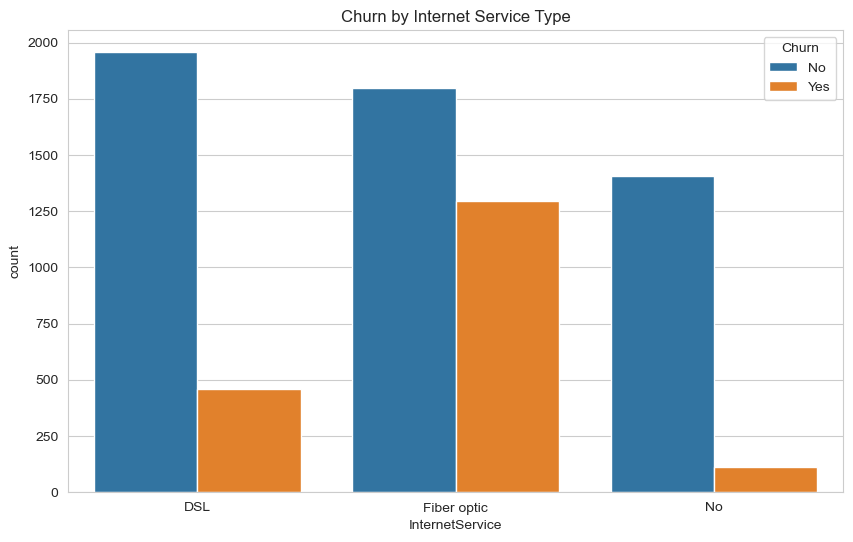

In [29]:
# Categorical Features (Example: InternetService vs Churn)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.show()

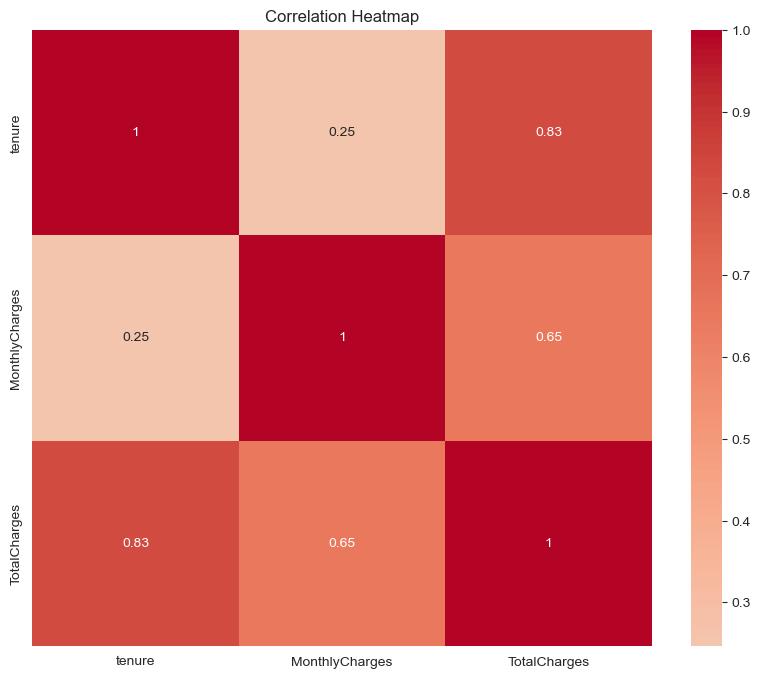

In [30]:
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [31]:
# Drop customerID as it's not a feature
df_final = df.drop('customerID', axis=1)

# Separate features and target
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [32]:
# Identify categorical columns (excluding the target)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numeric_cols}")

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [33]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y) # 0 for 'No', 1 for 'Yes'

# Save the label encoder for later use in prediction
joblib.dump(le, '../models/label_encoder.pkl')

['../models/label_encoder.pkl']

In [34]:
# Preprocess the features: One-Hot Encoding for categoricals
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_processed[numeric_cols] = scaler.fit_transform(X_processed[numeric_cols])

# Save the scaler for later use
joblib.dump(scaler, '../models/feature_scaler.pkl')

['../models/feature_scaler.pkl']

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Save the processed data (optional)
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
pd.Series(y_train).to_csv('../data/processed/y_train.csv', index=False, header=['Churn'])
pd.Series(y_test).to_csv('../data/processed/y_test.csv', index=False, header=['Churn'])

print("✅ Data preprocessing complete. Data is ready for modeling.")

Training set shape: (5625, 30)
Testing set shape: (1407, 30)
✅ Data preprocessing complete. Data is ready for modeling.
